# Data Base to get info about Power 9 and 8

In [1]:
#we use imb_db_dbi more than ibm_db
#import ibm_db as db 
import ibm_db_dbi
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
#DB connection
try:
    conn = ibm_db_dbi.connect('DATABASE=q9test1;'
                     'HOSTNAME=mtelbrus.rchland.ibm.com;'  # 127.0.0.1 or localhost works if it's local
                     'PORT=50000;'
                     'PROTOCOL=TCPIP;'
                     'UID=testeng;'
                     'PWD=Data.Science4Test;', '', '')
except:
    print("No connection:", ibm_db_dbi.conn_errormsg())
else:
    print("The connection was successful")

The connection was successful


In [3]:
query = """WITH ESS(MFGN,ORNO,TESTLOGICAL,PROD) AS (
select DISTINCT TCMFGN AS MFGN,TCORNO AS ORNO,TCMFS_TEST_CELL AS TESTLOGICAL,WUPROD AS PROD
from testengq.tcogda
join "QRYQ"."MFSGWU10_GRC" on tcmfgn = wumfgn and tcorno = WUWORN
where  START_TIMESTAMP between '2021-02-01 00:00:00' and '2021-03-01 00:00:00' and TEST_RUN_TIME is not null  and TCMMDL in ('22E') and substring(TCORNO,1,1) != 'Y' and WUPROD = 'ZZ_EDATA')
select distinct *, 
case
when T.TCPRLN in ('T_P8BRMP','T_P8BRZP') and TCCECC < 3 then 'Brazos 1-2 CECs AIX/Linux'
when T.TCPRLN in ('T_P9ZZP','T_P9ZZL') and T.TCMMDL not in ('22G','41G','42G','22E') then 'ZZ AIX/Linux'
when T.TCMMDL in ('22G','41G','42G','22E') and PROD IS NULL and T.TCPRLN in ('T_P9ZZP','T_P9ZZL') then 'ZZ Gen4 AIX/Linux'
when T.TCMMDL in ('22G','41G','42G','22E') and PROD IS NULL and T.TCPRLN in ('T_P9ZZI','T_P9ZZM') then 'ZZ Gen4 IBM i'
when T.TCMMDL in ('22E') and PROD = 'ZZ_EDATA' then 'ZZ Gen 4 ESS 5K'
when T.TCPRLN in ('T_P9ZEP')  then 'Zeppelin'
when T.TCPRLN in ('T_P8TULP')  then 'Tuleta AIX/Linux'
when T.TCPRLN in ('T_P8TULI')  then 'Tuleta / IBM i'
when T.TCPRLN in ('T_OPWSPN')  then 'Witherspoon'
when T.TCPRLN in ('T_OPMHWK')  then 'Mihawk'
when T.TCPRLN in ('T_OPGRSN')  then 'Garrison'
when T.TCPRLN in ('T_OPFIRE')  then 'Firestone'
when T.TCPRLN in ('T_P9ZZI','T_P9ZZM')  then 'ZZ IBM i'
when T.TCPRLN in('T_P8BRMI','T_P8BRZI') and T.TCCECC < 3 then 'Brazos 1-2 CECs IBM i'
when T.TCPRLN in ('T_P8BRMI','T_P8BRZI','T_P8BRMP','T_P8BRZP') and T.TCCECC > 2 then 'Brazos 3-4 CECs'
when T.TCPRLN in ('T_P9FLMP','T_P9FLTP','T_P9FIPR') and T.TCCECC < 3 then 'Fleetwood AIX/Linux'
when T.TCPRLN in ('T_P9FLMI','T_P9FLTI') and T.TCCECC < 3 then 'Fleetwood IBM i'
when T.TCPRLN in ('T_P9FLMI','T_P9FLMP','T_P9FLTI','T_P9FLTP','T_P9FIPR') and T.TCCECC > 2 then 'Fleetwood 3-4 CECs'
when T.TCPRLN in ('T_P8ALPQ','T_P8ALP ')  then 'Alpine'
end as NEWPRLN
from testengq.tcogda as T LEFT JOIN ESS 
ON TCMFGN = MFGN AND TCORNO = ORNO AND TCMFS_TEST_CELL = TESTLOGICAL
where T.START_TIMESTAMP between '2021-02-01 00:00:00' and '2021-03-01 00:00:00' and T.TEST_RUN_TIME is not null and substring(T.TCORNO,1,1) != 'Y' AND T.TCROUN = 1 
order by TOTAL_TIME DESC"""

In [4]:
df = pd.read_sql(query, conn)


In [5]:
df.fillna(0, inplace=True)
df

,TCROUN,TCMFGN,TCORNO,TCMFS_TEST_CELL,TCCECC,TCPRLN,TCMATP,TCMMDL,START_TIMESTAMP,FINISH_TIMESTAMP,TOTAL_TIME,TEST_CYCLE_TIME,TEST_RUN_TIME,TEST_ATN_MIN,TEST_ATN_CNT,TEST_RWK_MIN,TEST_RWK_CNT,SWPRE_RUN_TIME,SWPRE_ATN_MIN,SWPRE_ATN_CNT,SWPRE_RWK_MIN,SWPRE_RWK_CNT,EXT_RUN_TIME,EXT_ATN_MIN,EXT_ATN_CNT,EXT_RWK_MIN,EXT_RWK_CNT,HOLD_MIN,HOLD_CNT,MFGN,ORNO,TESTLOGICAL,PROD,NEWPRLN
0,1,1AU8BY7,A2MS1A,T3285856,0,T_OPWSPN,8335,GTH,2021-02-12 20:16:45,2021-02-13 22:15:20,25.96,25.80,808.51,33.49,16,659.0,6,0.0,0.0,0.0,0,0,47.0,0.0,0,0,0,0,0,0,0,0,0,Witherspoon
1,1,1AU8L05,A2N0KU,T3288810,0,T_OPWSPN,8335,GTH,2021-02-25 07:34:12,2021-02-26 06:16:55,22.70,22.53,688.24,12.76,6,574.0,5,29.0,0.0,0.0,0,0,48.0,0.0,0,0,0,0,0,0,0,0,0,Witherspoon
2,1,1AU8DB3,919NSF,T3287775,0,T_OPWSPN,8335,GTH,2021-02-19 22:30:31,2021-02-20 06:56:25,8.41,8.33,328.83,15.17,3,85.0,1,24.0,0.0,0.0,0,0,47.0,0.0,0,0,0,0,0,0,0,0,0,Witherspoon


In [6]:
df['Test'] = df['TEST_RUN_TIME'].apply(lambda x: x/60)
df

,TCROUN,TCMFGN,TCORNO,TCMFS_TEST_CELL,TCCECC,TCPRLN,TCMATP,TCMMDL,START_TIMESTAMP,FINISH_TIMESTAMP,TOTAL_TIME,TEST_CYCLE_TIME,TEST_RUN_TIME,TEST_ATN_MIN,TEST_ATN_CNT,TEST_RWK_MIN,TEST_RWK_CNT,SWPRE_RUN_TIME,SWPRE_ATN_MIN,SWPRE_ATN_CNT,SWPRE_RWK_MIN,SWPRE_RWK_CNT,EXT_RUN_TIME,EXT_ATN_MIN,EXT_ATN_CNT,EXT_RWK_MIN,EXT_RWK_CNT,HOLD_MIN,HOLD_CNT,MFGN,ORNO,TESTLOGICAL,PROD,NEWPRLN,Test
0,1,1AU8BY7,A2MS1A,T3285856,0,T_OPWSPN,8335,GTH,2021-02-12 20:16:45,2021-02-13 22:15:20,25.96,25.80,808.51,33.49,16,659.0,6,0.0,0.0,0.0,0,0,47.0,0.0,0,0,0,0,0,0,0,0,0,Witherspoon,13.475167
1,1,1AU8L05,A2N0KU,T3288810,0,T_OPWSPN,8335,GTH,2021-02-25 07:34:12,2021-02-26 06:16:55,22.70,22.53,688.24,12.76,6,574.0,5,29.0,0.0,0.0,0,0,48.0,0.0,0,0,0,0,0,0,0,0,0,Witherspoon,11.470667
2,1,1AU8DB3,919NSF,T3287775,0,T_OPWSPN,8335,GTH,2021-02-19 22:30:31,2021-02-20 06:56:25,8.41,8.33,328.83,15.17,3,85.0,1,24.0,0.0,0.0,0,0,47.0,0.0,0,0,0,0,0,0,0,0,0,Witherspoon,5.480500


In [7]:
df['Test'] = df['TEST_RUN_TIME'].apply(lambda x: x/60)
df['Rework'] = df['TEST_RWK_MIN'] + df['SWPRE_RWK_MIN'] + df['EXT_RWK_MIN']
df['Rework'] = df['Rework'].apply(lambda x: x/60)
df['Preload'] = df['SWPRE_RUN_TIME'].apply(lambda x : x/60)
df['Attention'] = df['TEST_ATN_MIN'] + df['SWPRE_ATN_MIN'] + df['EXT_ATN_MIN']
df['Attention'] = df['Attention'].apply(lambda x : x/60)
df['EXT_OPS'] = df['EXT_RUN_TIME'].apply(lambda x :x/60)
df['Hold'] = df['HOLD_MIN'].apply(lambda x :x/60)

In [8]:
graph_df = df[['TCORNO','Test','Rework','Preload','Attention','EXT_OPS','Hold']].copy()
graph_df

,TCORNO,Test,Rework,Preload,Attention,EXT_OPS,Hold
0,A2MS1A,13.475167,10.983333,0.000000,0.558167,0.783333,0.0
1,A2N0KU,11.470667,9.566667,0.483333,0.212667,0.800000,0.0
2,919NSF,5.480500,1.416667,0.400000,0.252833,0.783333,0.0


In [9]:
graph_df = graph_df.rename(columns={'TCORNO': 'ORDER_NUMBER'})

In [10]:
graph_df = graph_df.set_index('ORDER_NUMBER')

In [11]:
print(graph_df.columns)

Index(['Test', 'Rework', 'Preload', 'Attention', 'EXT_OPS', 'Hold'], dtype='object')


In [12]:
count = graph_df.groupby('ORDER_NUMBER').count()
count

,Test,Rework,Preload,Attention,EXT_OPS,Hold
ORDER_NUMBER,,,,,,
919NSF,1,1,1,1,1,1
A2MS1A,1,1,1,1,1,1
A2N0KU,1,1,1,1,1,1


In [13]:
target = count['Test'].values.copy()

In [14]:
target[:]=10

In [15]:
SMALL_SIZE = 5
MEDIUM_SIZE = 8
BIGGER_SIZE = 12
plt.rc('font', size=MEDIUM_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)

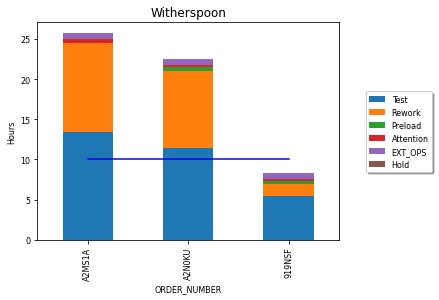

<Figure size 2880x2880 with 0 Axes>

In [16]:
ax = graph_df.plot(kind = 'bar',stacked=True)
ax.grid(False)
plt.title('Witherspoon')
plt.ylabel('Hours', color='k')
plt.plot(target, color='b')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.9, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.7), shadow=True, ncol=1)
plt.figure(figsize=(40,40))
plt.savefig('plot.png')
plt.show()

In [22]:
fig, ax = plt.subplots()
ax = graph_df.plot(kind = 'bar',stacked=True)
ax.grid(False)
ax.bar(graph_df.columns, graph_df[])
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars